In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [13]:
DIR_QUERIES = '../data/queries_3'
FILE_COMBINED = '../data/queries_combined/3.csv'

In [3]:
range_aliases = {
    "d_date = cast('2000-04-30' as date)": "1 day",
    "d_date between cast('2000-08-23' as date) and ((cast('2000-08-23' as date) + interval '14' day))": "2 weeks",
    "d_year = 2000 and d_moy = 1": "1 month",
    "d_year = 2000 and d_moy between 1 and 3": "3 months",
    "d_year = 2000 and d_moy between 1 and 6": "6 months",
    "d_year = 2000 and d_moy between 1 and 9": "9 months",
    "d_year = 2000": "1 year",
    "d_moy = 11": "month 11",
}

range_order = ['1 day', '2 weeks', '1 month', '3 months', '6 months', '9 months', '1 year', 'month 11']

In [10]:
file_list = os.listdir(DIR_QUERIES)

df = pd.DataFrame()

for file_name in file_list:
    if file_name.endswith('.csv'):
        df_query = pd.read_csv(f'{DIR_QUERIES}/{file_name}', header=None, names=['range', 'duration'])
        df_query['query'] = file_name.strip('.csv')
        df = pd.concat([df, df_query], ignore_index=True)

df = df[['query', 'range', 'duration']]

In [11]:
df = df.sort_values(by=['query', 'duration'])

In [12]:
display(df)

,query,range,duration
77,q1,d_date = cast('2000-04-30' as date),5809
83,q1,d_year = 1999 and d_moy = 8,5906
81,q1,d_date between cast('2000-08-23' as date) and ...,6240
82,q1,d_year = 2000 and d_moy = 1,7800
86,q1,d_year = 2000 and (d_moy between 6 and 8),9272
...,...,...,...
47,q95,d_year = 2000 and d_moy = 1,461744
41,q95,d_year = 2000 and d_moy between 1 and 3,463983
48,q95,d_moy = 11,464519
44,q95,d_year = 2000 and d_moy between 1 and 9,465980


In [14]:
df.to_csv(FILE_COMBINED, index=False)

/tmp/ipykernel_178658/1707624242.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(query_df_sorted['range'].map(range_aliases), rotation=45, ha='right')
/tmp/ipykernel_178658/1707624242.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(query_df_sorted['range'].map(range_aliases), rotation=45, ha='right')
/tmp/ipykernel_178658/1707624242.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(query_df_sorted['range'].map(range_aliases), rotation=45, ha='right')
/tmp/ipykernel_178658/1707624242.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(query_df_sorted['range'].map(range_aliases), rotation=45, ha='right')
/tmp/ipykernel_178658/1707624242.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(query_df_sorted['ran

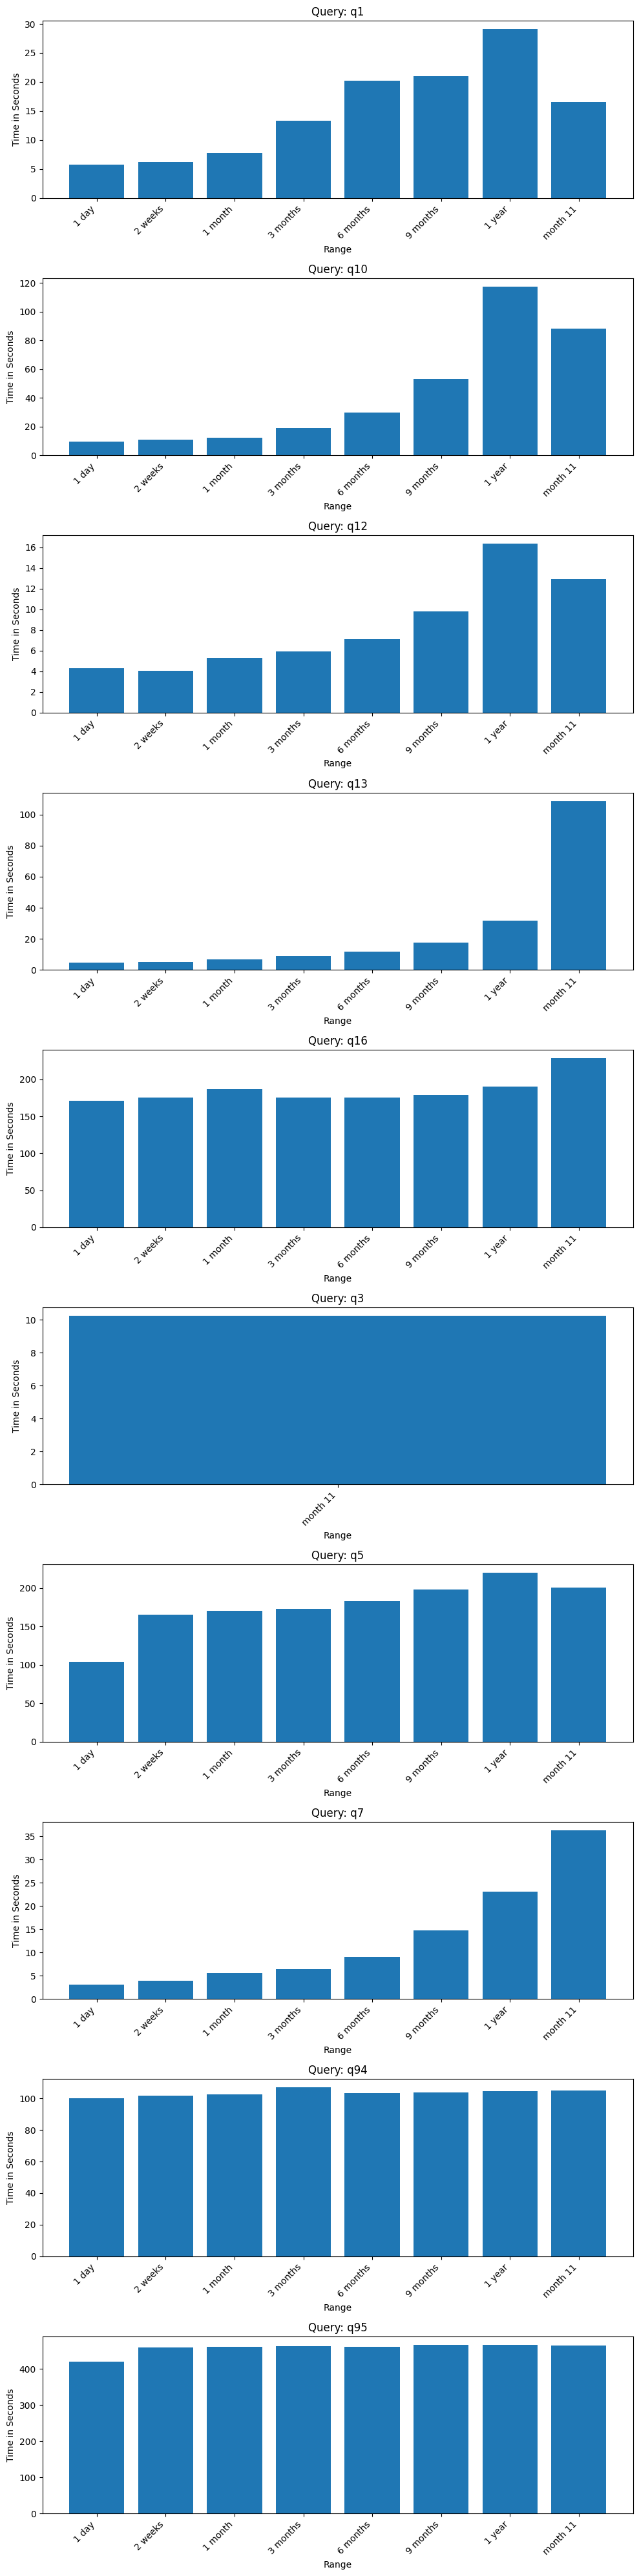

In [10]:
range_order_dict = {value: index for index, value in enumerate(range_order)}

df_filtered = df[df['range'].isin(range_aliases.keys())]
queries = df_filtered['query'].unique().tolist()

# Create subplots
fig, axs = plt.subplots(len(queries), 1, figsize=(10, len(queries)*4))

# Iterate over queries
for i, query in enumerate(queries):
    # Filter the dataframe for the current query
    query_df = df_filtered[df_filtered['query'] == query]
    
    # Sort the query dataframe based on the custom ordering
    query_df_sorted = query_df.sort_values(by='range', key=lambda x: x.map(range_aliases).map(range_order_dict))
    
    # Plot the bar chart for the current query
    axs[i].bar(query_df_sorted['range'].map(range_aliases), query_df_sorted['time'] / 1000)
    axs[i].set_xlabel('Range')
    axs[i].set_ylabel('Duration in Seconds')
    axs[i].set_title(f'Query: {query}')
    axs[i].set_xticklabels(query_df_sorted['range'].map(range_aliases), rotation=45, ha='right')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()